<a href="https://colab.research.google.com/github/19pa1a0583/AI/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression
==========

This notebook is a demo on implementing Linear Regression using sk-learn. We will be using a housing datset to train our model and make the predicitions.

Regression deals with a subset of machine learning approaches, that are generally used for predicting a continous output. It can be thought of as directly searching for a set of parameters that maximize the performance of a particular prediction model.

A simple line equation with slope $\omega_1$ and intercept $\omega_0$ is given by
                               
\begin{equation*}
\ y = \omega_1 x +\omega_0 \
\end{equation*}

This equation represents the relation between two variables, namely $x$ and $y$. Our goal is to find the weight values (\omega_1 and \omega_0) that maximise the performance i.e  the weight values that allows us best predict $y$ for a given $x$

#### Load the dataset

In [0]:
import pandas as pd # pandas is used for loading data from different files like csv, excel sheets etc
import numpy as np # numpy is used for dealing with arrays
from sklearn.model_selection import train_test_split # sklearn is used for creating models
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt #matplotlib is used for visualising the data

# %matplotlib inline # since we want all the figures to be displayed in the notebook itself we pass this parameter
# %config InlineBackend.figure_format = 'retina' 

In [0]:
!wget https://gist.github.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv

--2020-03-04 10:36:48--  https://gist.github.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv
Resolving gist.github.com (gist.github.com)... 192.30.253.118
Connecting to gist.github.com (gist.github.com)|192.30.253.118|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv [following]
--2020-03-04 10:36:48--  https://gist.githubusercontent.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2022817 (1.9M) [text/plain]


In [0]:
!ls

housing_data.csv  housing_data.csv.1  sample_data


In [0]:
# load the data from a csv file
data = pd.read_csv('https://raw.githubusercontent.com/bhargav23/Dataset/master/Toyota.csv',na_values=["??","????"])

#### Look at the data

In [0]:
data.columns

Index([u'Unnamed: 0', u'Price', u'Age', u'KM', u'FuelType', u'HP', u'MetColor',
       u'Automatic', u'CC', u'Doors', u'Weight'],
      dtype='object')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
Unnamed: 0    1436 non-null int64
Price         1436 non-null int64
Age           1336 non-null float64
KM            1421 non-null float64
FuelType      1336 non-null object
HP            1430 non-null float64
MetColor      1286 non-null float64
Automatic     1436 non-null int64
CC            1436 non-null int64
Doors         1436 non-null object
Weight        1436 non-null int64
dtypes: float64(4), int64(5), object(2)
memory usage: 123.5+ KB


In [0]:
data.dropna(axis=0,inplace=True)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1435
Data columns (total 11 columns):
Unnamed: 0    1096 non-null int64
Price         1096 non-null int64
Age           1096 non-null float64
KM            1096 non-null float64
FuelType      1096 non-null object
HP            1096 non-null float64
MetColor      1096 non-null float64
Automatic     1096 non-null int64
CC            1096 non-null int64
Doors         1096 non-null object
Weight        1096 non-null int64
dtypes: float64(4), int64(5), object(2)
memory usage: 102.8+ KB


In [0]:
# head is used to display first n entries of the data frame
data[["HP","CC","Price"]].head(10)

,HP,CC,Price
0,90.0,2000,13500
1,90.0,2000,13750
3,90.0,2000,14950
4,90.0,2000,13750
5,90.0,2000,12950
8,192.0,1800,21500
10,192.0,1800,20950
11,192.0,1800,19950
12,192.0,1800,19600
13,192.0,1800,21500


#### Univariate Linear Regression

In [0]:
# sklearn expects arrays as input for building the model
X = np.array(data['HP'])
y = np.array(data['Price'])

In [0]:
# we a need a test set to measure the performance of our model. 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Text(0,0.5,'Price')

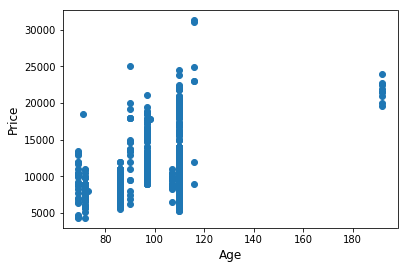

In [0]:
plt.scatter(data['HP'],data['Price'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Price', fontsize=12)

In [0]:
# X_train is a 1-d array, since skleanr expects 2-d array as input, we are changing the dimension.
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [0]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
regr.coef_

array([85.02207755])

In [0]:
regr.intercept_

2187.666138065304

In [0]:
# training error
regr.score(X_train, y_train)

0.12155839337691643

In [0]:
# testing error
regr.score(X_test, y_test)

0.03556160788430551

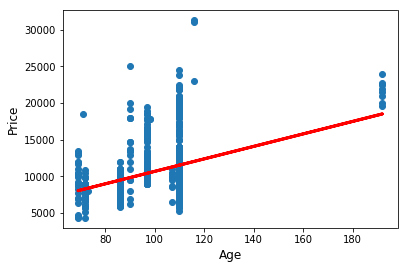

In [0]:
# Plot predictions on training data
plt.scatter(X_train, y_train)
plt.plot(X_train, regr.predict(X_train), color='red',
         linewidth=3)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

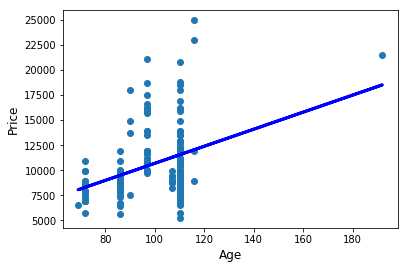

In [0]:
# Plot predictions on testing data
plt.scatter(X_test, y_test)
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

##### Exercise: Try implementing Univariate Linear Regression with other variables. 

#### Multivariate Linear Regression

In [0]:
len(data.columns)

11

In [0]:
X = np.array(data[['HP', 'CC']])
y = np.array(data['Price'])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [0]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
regr.coef_

array([81.5016134 ,  2.34538147])

In [0]:
regr.intercept_

-1063.3024287795324

In [0]:
# training error
regr.score(X_train, y_train)

0.1226731281414224

In [0]:
# testing error
regr.score(X_test, y_test)

0.08310917910926297

In [0]:
regr.predict([[192,1800]])

array([18806.69398345])

In [0]:
data.corr()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
Unnamed: 0,1.000000,-0.736823,0.905410,0.299948,-0.103647,-0.077610,0.055810,-0.143254,-0.396662
Price,-0.736823,1.000000,-0.877706,-0.601944,0.334261,0.117381,0.045111,0.099880,0.532614
Age,0.905410,-0.877706,1.000000,0.525695,-0.162063,-0.106291,0.026304,-0.084851,-0.442295
KM,0.299948,-0.601944,0.525695,1.000000,-0.368629,-0.109031,-0.054777,0.319733,-0.029703
HP,-0.103647,0.334261,-0.162063,-0.368629,1.000000,0.065218,0.023112,0.037291,0.084527
MetColor,-0.077610,0.117381,-0.106291,-0.109031,0.065218,1.000000,-0.000476,0.009902,0.055382
Automatic,0.055810,0.045111,0.026304,-0.054777,0.023112,-0.000476,1.000000,-0.053516,0.069788
CC,-0.143254,0.099880,-0.084851,0.319733,0.037291,0.009902,-0.053516,1.000000,0.623643
Weight,-0.396662,0.532614,-0.442295,-0.029703,0.084527,0.055382,0.069788,0.623643,1.000000


In [0]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])

y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

z = np.polyfit(x, y,2)
z

array([-0.16071429,  0.50071429,  0.22142857])

**It is convenient to use poly1d objects for dealing with polynomials:**

In [0]:
p = np.poly1d(z)
print(p)
print(p(0.5))

print(p(3.5))

print(p(10))


         2
-0.1607 x + 0.5007 x + 0.2214
0.43160714285714247
0.005178571428570228
-10.842857142857145


**High-order polynomials may oscillate wildly:**



In [0]:
p30 = np.poly1d(np.polyfit(x, y, 30))

print(p30(4))

print(p30(5))

print(p30(4.5))

-0.7999999999999974
-1.0000000000000089
-0.11804856672740521


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


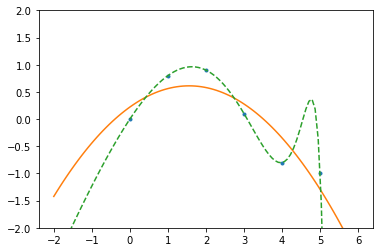

In [0]:
import matplotlib.pyplot as plt
xp = np.linspace(-2, 6, 100)
plt.plot(x, y,'.')
plt.plot(xp, p(xp),'-')
plt.plot(xp, p30(xp),'--')

plt.ylim(-2,2)

plt.show()

In [0]:
p = np.poly1d([3, 4, 1])
print(np.poly1d(p))

   2
3 x + 4 x + 1


In [0]:
print(p(2))

21


In [0]:
p.r

array([-1.        , -0.33333333])

In [0]:
p.c

array([3, 4, 1])

In [0]:
x = np.array(data['Age'])

y = np.array(data['Price'])

z = np.polyfit(x, y, 1)

In [0]:
z

array([ -170.69560407, 20237.10978664])

In [0]:
p = np.poly1d(z)
print(p)
print(p(30))

print(p(10))

print(p(20))


 
-170.7 x + 2.024e+04
15116.241664604295
18530.1537459599
16823.197705282095


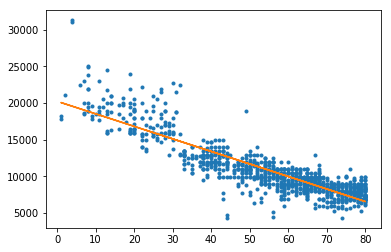

In [0]:
import matplotlib.pyplot as plt

plt.plot(x, y,".",x, p(x),"-")

plt.show()